In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

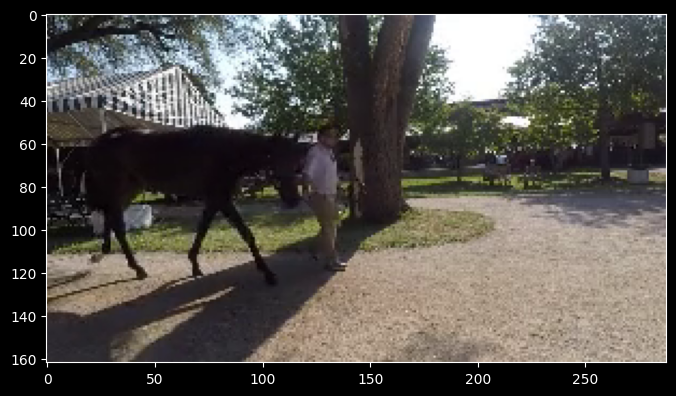

In [3]:
scene_frame_number = 100
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/Horse_template.yaml")

config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])

video_path = config['video_info']['video_file_path'] 


cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [4]:
amadeus = AMADEUS(config)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0 $
current total tokens 517
The image shows a person walking a horse on a dirt path. The background includes trees, a large tent-like structure, and other people in the distance.

```json
{
    "description": "A person is walking a horse on a dirt path with trees and a tent-like structure in the background.",
    "individuals": 1,
    "species": "sideview_quadruped",
    "background_objects": ["trees", "tent-like structure", "people"]
}
```


In [5]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print (f'videos generated to {qa_message["out_videos"]}')
    print ('Open it with media player if it does not properly display in the notebook')
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:

            display(Video(video_path, embed=True))

    display(Markdown(str(qa_message['function_rets'])))

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.04 $
current total tokens 6589


To plot the gait analysis using the specified keypoints (Offfrontfoot, Offfrontfetlock, Offknee, Elbow, and Shoulder), we can use the `run_gait_analysis` and `plot_gait_analysis_results` functions from the `AnimalBehaviorAnalysis` class. 

Here's a step-by-step explanation of what the code will do:
1. **Create an instance of `AnimalBehaviorAnalysis`**: This will be done using the `create_analysis` function with the provided `config`.
2. **Run gait analysis**: Use the `run_gait_analysis` function with the specified keypoints to compute the gait parameters.
3. **Plot the results**: Use the `plot_gait_analysis_results` function to plot the results of the gait analysis.

The function will look like this:

```python
def plot_gait_analysis(config: Config):
    """
    This function plots the gait analysis using the specified keypoints: Offfrontfoot, Offfrontfetlock, Offknee, Elbow, and Shoulder.
    
    Parameters:
    ----------
    config: Config
        The configuration object containing necessary parameters.
    
    Returns:
    -------
    tuple
        A tuple containing the figure and axes of the plot.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Define the keypoints for gait analysis
    limb_keypoint_names = ['Offfrontfoot', 'Offfrontfetlock', 'Offknee', 'Elbow', 'Shoulder']
    
    # Run gait analysis
    gait_analysis_results = analysis.run_gait_analysis(limb_keypoint_names=limb_keypoint_names)
    
    # Plot the gait analysis results
    figure, axs = analysis.plot_gait_analysis_results(gait_analysis_results=gait_analysis_results, 
                                                      limb_keypoints=limb_keypoint_names, 
                                                      color_stance="plum")
    
    return figure, axs
```

This function will generate and return the plot of the gait analysis using the specified keypoints.

after executing the function


{'description': 'A person is walking a horse on a dirt path with trees and a tent-like structure in the background.',
 'individuals': 1,
 'species': 'sideview_quadruped',
 'background_objects': ['trees', 'tent-like structure', 'people']}

None


(<Figure size 800x800 with 1 Axes>, <Axes: ylabel='Limb'>)

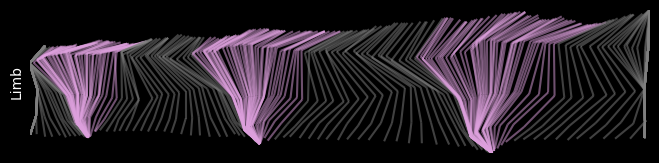

In [7]:
query = "Plot the gait analysis using Offfrontfoot; Offfrontfetlock; Offknee; Elbow and Shoulder."
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)